In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model, model_selection, metrics, ensemble
import matplotlib.pylab as plt
import seaborn as sns
import itertools

In [2]:
#Load in data, create pandas dataframes, combine target and features.

cancer_ds = datasets.load_breast_cancer()
features = pd.DataFrame(data = cancer_ds.data, columns = cancer_ds.feature_names)
target = pd.DataFrame(data = cancer_ds.target, columns = ['diagnosis'])
df = pd.concat([target, features], axis = 1)

In [3]:
#Show column names
df.columns.values

array(['diagnosis', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], dtype=object)

In [4]:
#Get information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 no

In [5]:
#Replace all spaces in column names with underscores
df.columns = [x.replace(' ', '_') for x in df.columns]

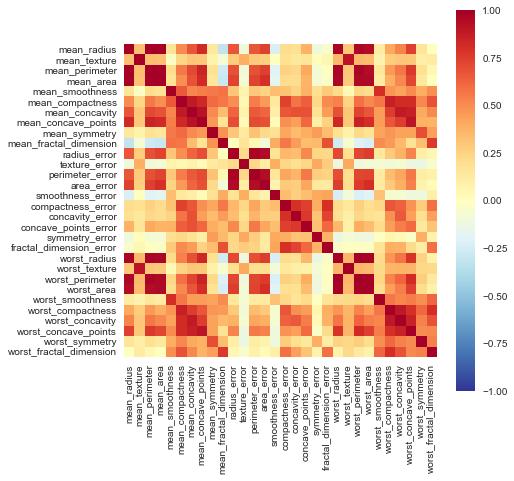

In [6]:
#Plot correlations between all variables
figure = plt.figure(figsize = [7, 7])
ax = plt.imshow(df[df.columns[1:]].corr(), 
                vmin = -1.0, 
                vmax = 1.0, 
                interpolation = 'None', 
                cmap = 'RdYlBu_r')

plt.xticks(np.arange(0, df.shape[1] - 1), df.columns[1:], rotation = 90);
plt.yticks(np.arange(0, df.shape[1] - 1), df.columns[1:]);
plt.colorbar();
plt.grid();

In [7]:
#Divide data into training and testing data (80% / 20% split)
train, test = model_selection.train_test_split(df, train_size = 0.8, random_state = 101)
print('Training data shape = {}'.format(train.shape))
print('Testing data shape = {}'.format(test.shape))

Training data shape = (455, 31)
Testing data shape = (114, 31)


In [8]:
#Training data
y_train = train['diagnosis']
x_train = train
x_train = x_train.drop(labels = ['diagnosis'], axis = 1).apply(stats.zscore)

In [9]:
#Testing data
y_test = test['diagnosis']
x_test = test
x_test = x_test.drop(labels = ['diagnosis'], axis = 1).apply(stats.zscore)

Accuracy of the model is 95.61%


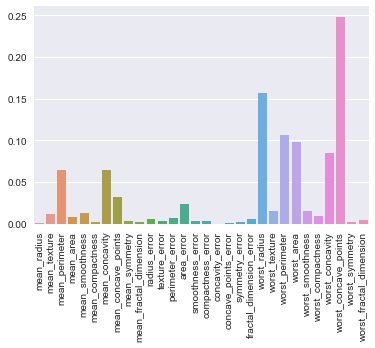

In [63]:
#Run Random Forest to classify 

rf = ensemble.RandomForestClassifier(random_state = 101)
rf_model = rf.fit(x_train, y_train)
y_hat = rf_model.predict(x_test)

#Show model accuracy
print('Accuracy of the model is {}%'.format(np.round(metrics.accuracy_score(y_test, y_hat), decimals = 4) * 100))
cm = metrics.confusion_matrix(y_test, y_hat)

#Plot coefficents
plt.figure()
ax = sns.barplot(x = np.arange(0, rf_model.feature_importances_.shape[0]), 
            y = rf_model.feature_importances_);
plt.xticks(np.arange(0, rf_model.feature_importances_.shape[0]), 
           x_test.columns, 
           rotation = 90);

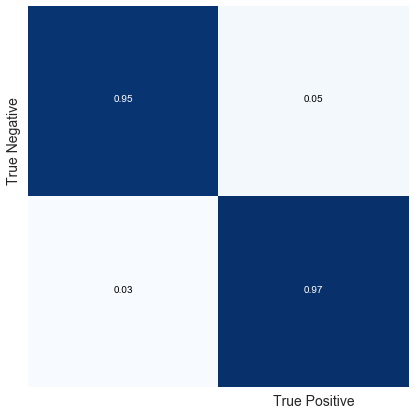

In [62]:
#Plot confusion matrix 
cmap = plt.cm.Blues
cm_stand = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm_stand
thresh = cm_stand.max() / 2

plt.figure(figsize = [7, 7])
plt.imshow(cm_stand, cmap = cmap)
plt.grid()

plt.xticks(np.arange(0, 2), ['', 'True Positive'], fontsize=14)
plt.yticks(np.arange(0, 2), ['True Negative', ''], rotation = 90, fontsize=14)

for i, j in itertools.product(range(cm_stand.shape[0]), range(cm_stand.shape[1])):
    plt.text(j, i, format(cm_stand[i, j], '.2f'),
             horizontalalignment = 'center',
             color = 'white' if cm_stand[i, j] > thresh else 'black')

Accuracy of the model is 99.12%


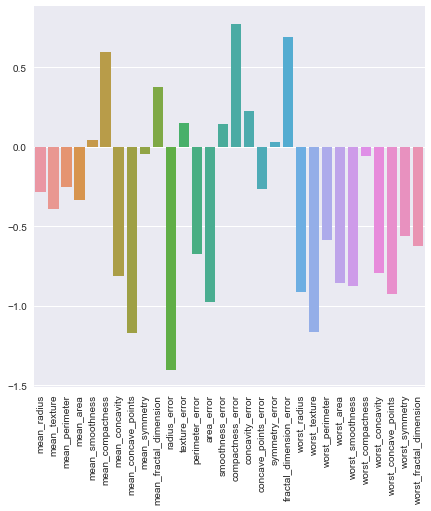

In [56]:
#Repeat with standard logistic regression 
log_reg = linear_model.LogisticRegression(random_)
log_model = log_reg.fit(x_train, y_train)
y_hat = log_model.predict(x_test)
log_model.class_weight

#Show model scores
print('Accuracy of the model is {}%'.format(np.round(metrics.accuracy_score(y_test, y_hat), decimals = 4) * 100))
cm = metrics.confusion_matrix(y_test, y_hat)

coef = log_model.coef_[0]

#Plot coeffiencients
plt.figure(figsize = [7, 7])
ax = sns.barplot(x = np.arange(0, coef.shape[0]), 
                 y = coef);
plt.xticks(np.arange(0, coef.shape[0]), 
           x_test.columns, 
           rotation = 90);

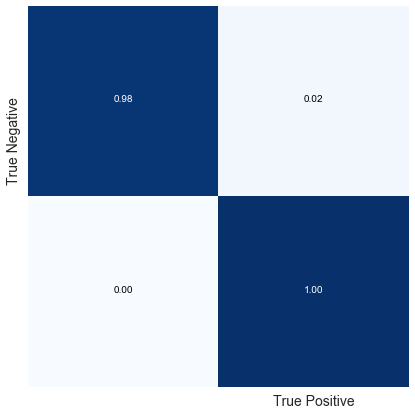

In [55]:
#Plot confusion matrix 
cmap = plt.cm.Blues
cm_stand = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm_stand
thresh = cm_stand.max() / 2

plt.figure(figsize = [7, 7])
plt.imshow(cm_stand, cmap = cmap)
plt.grid()

plt.xticks(np.arange(0, 2), ['', 'True Positive'], fontsize=14)
plt.yticks(np.arange(0, 2), ['True Negative', ''], rotation = 90, fontsize=14)

for i, j in itertools.product(range(cm_stand.shape[0]), range(cm_stand.shape[1])):
    plt.text(j, i, format(cm_stand[i, j], '.2f'),
             horizontalalignment = "center",
             color="white" if cm_stand[i, j] > thresh else "black")